This notebook is one of the test I did during my specialization, it's the first one about deep learning where we had to answer some of the teacher's questions like load a dataset, do some tasks of data preprocessing, create two models, plot the loss curves and make some predictions on the Student Depression Dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score
import tensorflow as tf

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14168\2986737750.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Question 1

# Load data
df = pd.read_csv('StudentDepressionDataset.csv')

# Show first 10 rows of the dataset.
df.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


In [3]:
# Show general information of the dataset.
df.info() # With this information we can already see which are the categorical and numerical columns and see that there are only 3 missing values in the 'Financial Stress' column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
# Show a statistical resume of the numerical columns of the dataset
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
# How many rows and columns the dataset has ? 

df.shape # We can check there are 27901 rows and 18 columns

(27901, 18)

In [6]:
# Question 2
# Which rows do you think we should drop ?

""" 
I believe we should drop the 'id' and 'city' columns, as they are not significant factors in determining whether a student suffers from depression. 
Regarding the 'Degree' column, I would consider whether it should be retained or removed. 
The level of difficulty of a degree could influence the likelihood of experiencing depression—for example, it may be less likely for students in easier degrees. 
However, in this case, I have decided to drop it as well.
"""

# Drop 'id', 'city' and 'Degree' from the dataset
df.drop(['id', 'City', 'Degree'], axis=1, inplace=True)

In [7]:
# Check if the columns has been removed succesfully
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0


In [8]:
# Look for missing values in the dataset
df.isnull().sum() # Doing this we are going to see 3 missing values in the Financial Stress column

Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
# Replace the null values with the median.

df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

# Check if the replace it's completed succesfully
df.isnull().sum() 

Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
# Question 3 - Null values handling

# Create a new column named category_of_depresion that classifies the level of depression in 3 categories

# Low (0) if the level is between less or equal than 3.
# Medium (1) if the level is 4.
# High (2) if the level is greater or equal than 5.

df['category_of_depresion'] = df['Financial Stress']
df.loc[df['category_of_depresion'] <= 3, 'category_of_depresion'] = 0
df.loc[(df['category_of_depresion'] > 3) & (df['category_of_depresion'] < 5), 'category_of_depresion'] = 1
df.loc[df['category_of_depresion'] >= 5, 'category_of_depresion'] = 2

In [11]:
# Check if the values have been processed correctly

df['category_of_depresion'].value_counts()

category_of_depresion
0.0    15411
2.0     6715
1.0     5775
Name: count, dtype: int64

<Axes: xlabel='category_of_depresion', ylabel='count'>

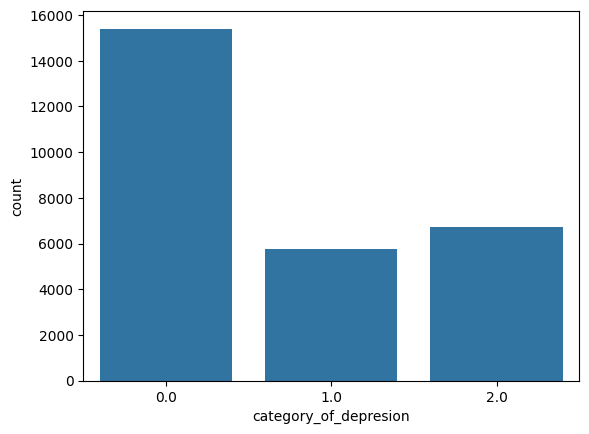

In [12]:
# Plot the amount of students in each of the categories.
sns.countplot(data=df, x='category_of_depresion')

In [13]:
# Drop the column we just created
df.drop(['category_of_depresion'], axis=1, inplace=True)

In [14]:
# Check if it has been removed succesfully
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0


In [15]:
data_cleaned = df

In [16]:
# Categorical data encoding
# Encode: Gender, Profession, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ? and Family History of Mental Illness using LabelEncoder.

categorical_columns = ['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits',
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

# Why do we need to do this process ? 
""" 
We need to encode the categorical features to be able to train the model as it only works with numerical data.
"""

' \nWe need to encode the categorical features to be able to train the model as it only works with numerical data.\n'

In [17]:
# Check if the encoding worked well
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,11,5.0,0.0,8.97,2.0,0.0,0,0,1,3.0,1.0,0,1
1,0,24.0,11,2.0,0.0,5.90,5.0,0.0,0,1,0,3.0,2.0,1,0
2,1,31.0,11,3.0,0.0,7.03,5.0,0.0,2,0,0,9.0,1.0,1,0
3,0,28.0,11,3.0,0.0,5.59,2.0,0.0,1,1,1,4.0,5.0,1,1
4,0,25.0,11,4.0,0.0,8.13,3.0,0.0,0,1,1,1.0,1.0,0,0


In [18]:
# Question 4
# Split features and target
X = df.drop(['Depression'], axis=1)
y = df['Depression']

In [19]:
# Split data in train, test and validation (70%-15%-15%).
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15)

In [21]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')
print(f'Val shape: {X_val.shape}')

Train shape: (20157, 14)
Test shape: (4186, 14)
Val shape: (3558, 14)


In [22]:
# Question 5
# Apply StandardScaler to train, test and validation data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [23]:
# Question 6 
# Define a neural network for a binary classification task.

# Input shape equal to the numbers of features of the dataset
# At least two hidden layers with relu as activation function.
# One output layer with sigmoid as activation function.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

#Summary of the model and a brief explanation of what it contains
model.summary()

""" The summary shows the different layers of the model, how many neurons contain and the trainable parameters on each of the layers.
At the end it shows the total trainable parameters of our model which in this case there are 3.585 parameters """


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (1

' The summary shows the different layers of the model, how many neurons contain and the trainable parameters on each of the layers.\nAt the end it shows the total trainable parameters of our model which in this case there are 3.585 parameters '

In [24]:
# Question 7
# Train the model for 20 epochs, using binary_crossentropy as loss function, adam as optimizer and accuracy as metric

model.compile(
    optimizer='adam',  
    loss='binary_crossentropy',
    metrics=['accuracy'] 
)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs= 20)


Epoch 1/20


630/630 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.8271 - val_loss: 0.3424 - val_accuracy: 0.8524
Epoch 2/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3676 - accuracy: 0.8463 - val_loss: 0.3365 - val_accuracy: 0.8502
Epoch 3/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8465 - val_loss: 0.3463 - val_accuracy: 0.8460
Epoch 4/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8490 - val_loss: 0.3384 - val_accuracy: 0.8516
Epoch 5/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3597 - accuracy: 0.8488 - val_loss: 0.3368 - val_accuracy: 0.8522
Epoch 6/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3573 - accuracy: 0.8505 - val_loss: 0.3443 - val_accuracy: 0.8510
Epoch 7/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3573 - accuracy: 0.8493 - val_loss: 0.3450 - val_accuracy: 0.8485
Epo

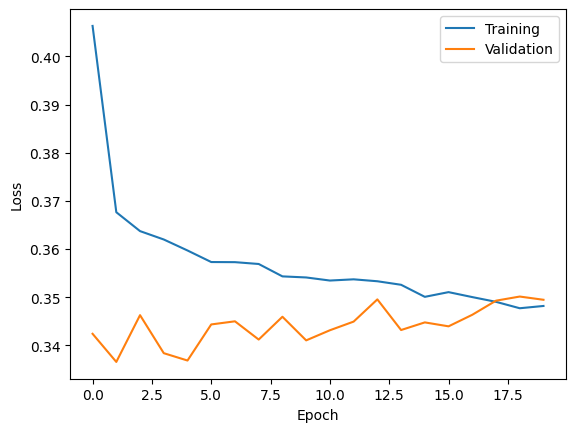

In [25]:
# Question 8
# Plot the loss and val_loss curve
def plot_history():
    plt.plot(history.history['loss'], label="Training")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc="upper right")

plot_history()

In [26]:
# Question 9
# Evaluate the model using the test data and print the loss and accuracy
loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Pérdida: {loss}')
print(f'Accuracy: {accuracy}')

predicts = model.predict(X_test_scaled)

y_pred = (predicts > 0.5).astype(int)
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

131/131 [==============================] - 0s 902us/step - loss: 0.3723 - accuracy: 0.8366
Pérdida: 0.3723151385784149
Accuracy: 0.8365981578826904
131/131 [==============================] - 0s 826us/step
Precisión: 0.8369857747020377


In [27]:
# Question 10
# Improve the model adding callbakcs like earlystopping
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.85):
      print("Acuracy reached 85%, stopping training")
      self.model.stop_training = True

callbacks = myCallback()

model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(
    optimizer='adam', 
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)
history2 = model2.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs= 20, callbacks=([callbacks]))

Epoch 1/20
630/630 [==============================] - 2s 2ms/step - loss: 0.4054 - accuracy: 0.8237 - val_loss: 0.3449 - val_accuracy: 0.8530
Epoch 2/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3687 - accuracy: 0.8458 - val_loss: 0.3370 - val_accuracy: 0.8499
Epoch 3/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8488 - val_loss: 0.3414 - val_accuracy: 0.8499
Epoch 4/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3628 - accuracy: 0.8499 - val_loss: 0.3444 - val_accuracy: 0.8496
Epoch 5/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3590 - accuracy: 0.8491 - val_loss: 0.3382 - val_accuracy: 0.8505
Epoch 6/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3589 - accuracy: 0.8490 - val_loss: 0.3396 - val_accuracy: 0.8488
Epoch 7/20
630/630 [==============================] - 1s 1ms/step - loss: 0.3574 - accuracy: 0.8515 - val_loss: 0.3407 - val_accuracy: 0.8516


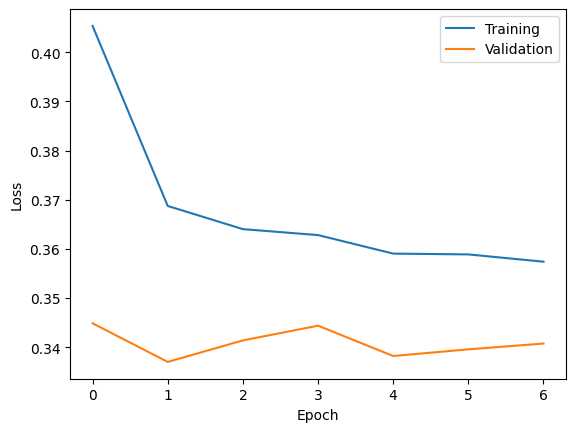

In [28]:
def plot_history():
    plt.plot(history2.history['loss'], label="Training")
    plt.plot(history2.history['val_loss'], label="Validation")
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc="upper right")

plot_history()

In [29]:
loss2, accuracy2 = model2.evaluate(X_test_scaled, y_test)

print(f'Pérdida: {loss2}')
print(f'Accuracy: {accuracy2}')

predicts2 = model2.predict(X_test_scaled)

y_pred2 = (predicts2 > 0.5).astype(int)
precision2 = precision_score(y_test, y_pred)
print(f'Precisión: {precision2}')

131/131 [==============================] - 0s 892us/step - loss: 0.3739 - accuracy: 0.8335
Pérdida: 0.3739183247089386
Accuracy: 0.8334925770759583
131/131 [==============================] - 0s 796us/step
Precisión: 0.8369857747020377


In [30]:
""" 
By implementing Early Stopping, we achieve the same loss, accuracy, and precision in just 6 epochs instead of 20. 
This method significantly reduces training time, particularly when working with large datasets where training can be computationally expensive."""

' \nBy implementing Early Stopping, we achieve the same loss, accuracy, and precision in just 6 epochs instead of 20. \nThis method significantly reduces training time, particularly when working with large datasets where training can be computationally expensive.'